In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definamos el sistema usando una lista
G = np.array([lambda x,y,z: 6*x - 2*np.cos(y*z) - 1.,
     lambda x,y,z: 9*y + np.sqrt( x**2 + np.sin(z) + 1.06 ) + 0.9,
     lambda x,y,z: 60*z + 3*np.exp(-x*y)+10*np.pi - 3])

In [3]:
def GetVectorF(G,r):
    
    dim = len(G)
    
    v = np.zeros( dim )
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1],r[2])
    
    return v

In [4]:
def GetJacobian(G,r,h=0.0001):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (G[i](r[0]+h,r[1],r[2]) - G[i](r[0]-h,r[1],r[2]))/(2*h)  
        J[i,1] = (G[i](r[0],r[1]+h,r[2]) - G[i](r[0],r[1]-h,r[2]))/(2*h) 
        J[i,2] = (G[i](r[0],r[1],r[2]+h) - G[i](r[0],r[1],r[2]-h))/(2*h) 
    
    # Debemos retornar la traspuesta del Jacobiano, que representa el gradiente de la función vectorial
    return J.T

In [5]:
def NewtonRaphson(G,r,error=1e-7):
    
    it = 0
    d = 1.
    dvector = []
    
    while d > error:
    
        it += 1
    
        rc = r # Valor actual
    
        F = GetVectorF(G,r)
        J = GetJacobian(G,r)
        InvJ = np.linalg.inv(J)
        
        r = rc - np.dot(InvJ,F)
          
        diff = r-rc
        
        d = np.linalg.norm(diff)
        
        dvector.append(d)
               
    return r,it,dvector

In [6]:
r = np.zeros(len(G))
r,it,distancias = NewtonRaphson(G,r)
print(r,it)

[ 0.49814468 -0.19960588 -0.52882598] 8


In [7]:
np.round(GetVectorF(G,r),3)

array([-0.,  0.,  0.])

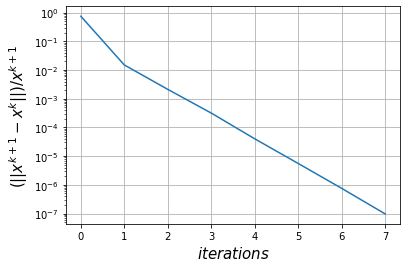

In [8]:
plt.plot(distancias)
plt.yscale('log')
plt.xlabel(r'$iterations$', fontsize=15)
plt.ylabel(r'$(|| x^{k+1} - x^{k} ||)/x^{k+1} $', fontsize=15)
plt.grid()